In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV file into a DataFrame
data = pd.read_csv('../../data/sleep_patterns/V6_student_sleep_patterns.csv')

# Display basic information about the DataFrame
data.info()

# Display summary statistics for numerical columns
data.describe()

# Display the number of missing values in each column
data.isnull().sum()

# Display the unique values in each column
for column in data.columns:
    print(f"{column}: {data[column].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         500 non-null    int64  
 1   Age                500 non-null    int64  
 2   Gender             500 non-null    object 
 3   University_Year    500 non-null    object 
 4   Sleep_Duration     500 non-null    float64
 5   Study_Hours        500 non-null    float64
 6   Screen_Time        500 non-null    float64
 7   Caffeine_Intake    500 non-null    int64  
 8   Physical_Activity  500 non-null    float64
 9   Sleep_Quality      500 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 39.2+ KB
Student_ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60 

In [ ]:
# Drop rows with missing values
data = data.dropna()

# Drop the Student_ID column
data = data.drop(['Student_ID'], axis=1)

# Encode categorical variables (if any)
data['Gender'] = data['Gender'].astype('category').cat.codes
data['University_Year'] = data['University_Year'].astype('category').cat.codes

# Separate features and target
X = data.drop(['Sleep_Quality'], axis=1)
y = data['Sleep_Quality']

# Normalize or standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

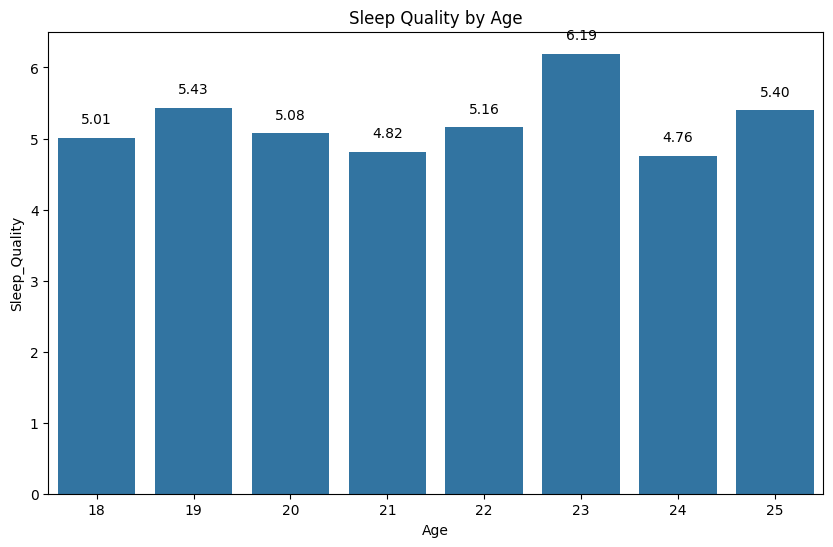

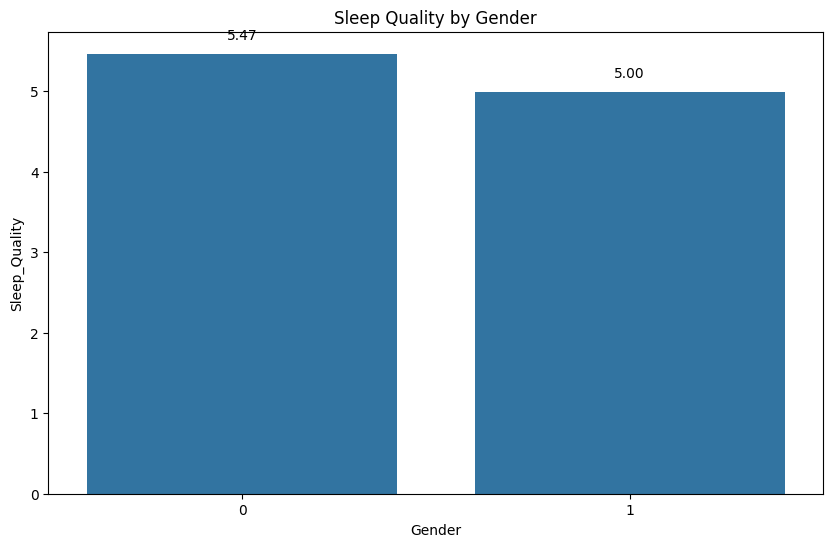

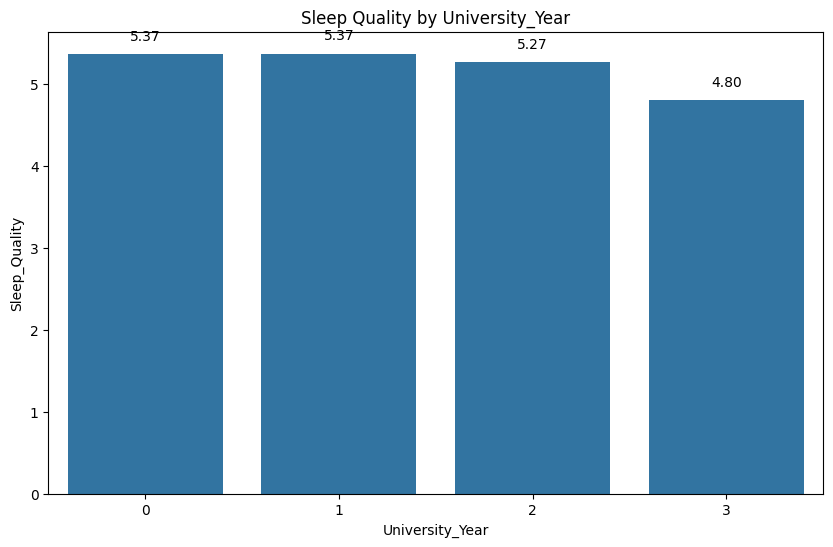

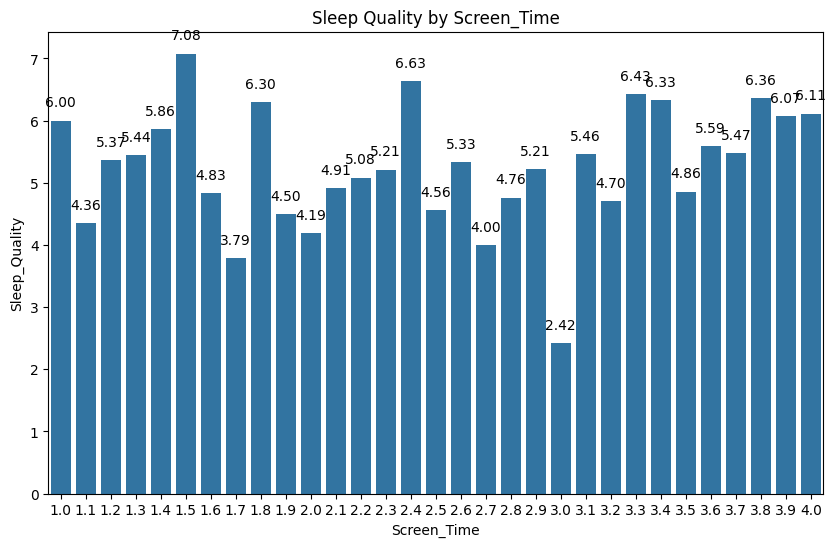

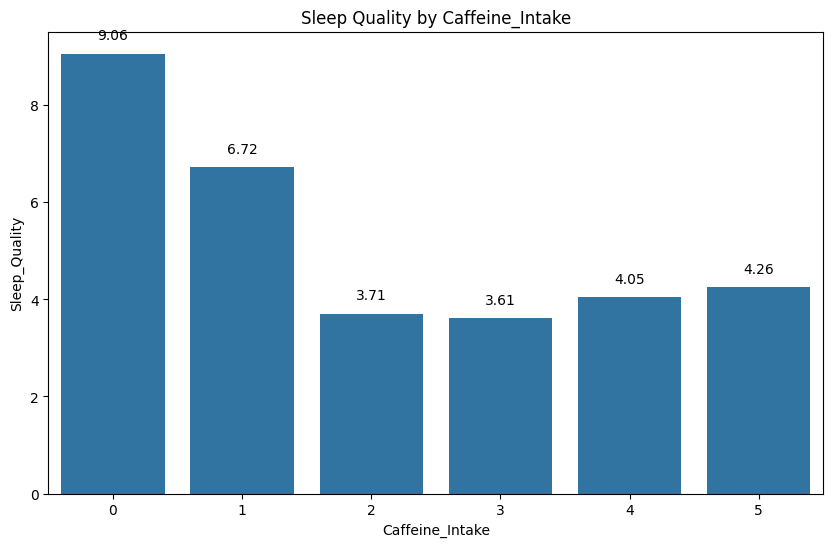

In [6]:
columns = ['Age', 'Gender', 'University_Year', 'Screen_Time', 'Caffeine_Intake']

for col in columns:
    x = data.groupby([col])['Sleep_Quality'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=col, y='Sleep_Quality', data=x)
    for i in range(x.shape[0]):
        ax.annotate(f"{x['Sleep_Quality'][i]:.2f}", (i, x['Sleep_Quality'][i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title(f'Sleep Quality by {col}')
    plt.show()